In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

# 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [2]:
# Establish dataframe from csv file
telco = pd.read_csv('telco_churn.csv')

# Remove null values
telco=telco.dropna()

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Perform statistical test to see correlation between tenure and monthly charges (pearson r correlation test)
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

r, p

(0.24789985628615008, 4.0940449915016345e-99)

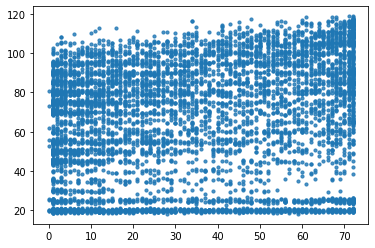

In [6]:
# Use scatter plot to visualize correlation
plt.scatter(telco.tenure,telco.MonthlyCharges, s=10, alpha=0.8)

- Per the r value of my statistical test and the visualization, we can conclude there is not a strong correlation between tenure and monthly charges among Telcoco customers

In [7]:
# Replace all empty values with 0.00
telco['TotalCharges'] = telco['TotalCharges'].str.replace(" ", '0.00')

In [8]:
# Convert total charges to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'])

In [9]:
# Perform statistical test to see correlation between tenure and total charges (pearson r correlation test)
r, p = stats.pearsonr(telco.tenure, telco.TotalCharges)

r, p

(0.8261783979502422, 0.0)

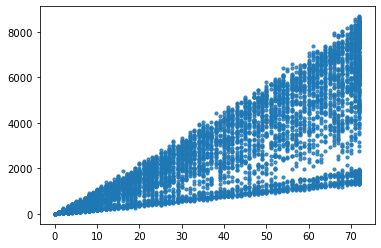

In [10]:
# Use scatter plot to visualize correlation
plt.scatter(telco.tenure,telco.TotalCharges, s=10, alpha=0.8)

- Per the results of my statistical test and the visualization, we can conclude that there does appear to be a strong correlation between a customer's tenure and the amount of money they have spent total at Telcoco

In [11]:
# Create a subset of the data to control for customers who do have phone service
telco_phone = telco[telco.PhoneService == 'Yes']

telco_phone.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [12]:
# Perform statistical test to see correlation between tenure and monthly charges (pearson r correlation test)
r, p = stats.pearsonr(telco_phone.tenure, telco_phone.MonthlyCharges)

r, p

(0.24538898585362884, 7.117871077967264e-88)

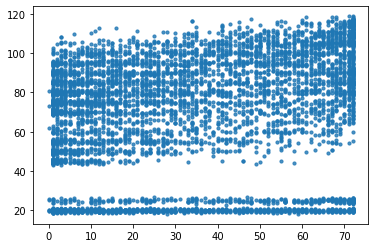

In [13]:
# Use scatter plot to visualize correlation
plt.scatter(telco_phone.tenure,telco_phone.MonthlyCharges, s=10, alpha=0.8)

In [14]:
# Perform statistical test to see correlation between tenure and total charges (pearson r correlation test)
r, p = stats.pearsonr(telco_phone.tenure, telco_phone.TotalCharges)

r, p

(0.8301076972900363, 0.0)

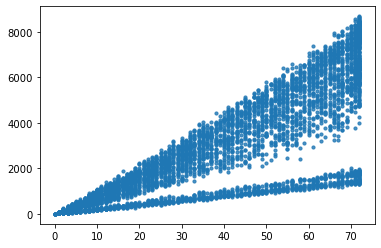

In [15]:
# Use scatter plot to visualize correlation
plt.scatter(telco_phone.tenure,telco_phone.TotalCharges, s=10, alpha=0.8)

- When controlling for customers who do have phone there does not appear to be much difference in correlation.

In [16]:
telco.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
# Create a subset of the data to control for customers who do have internet service
telco_internet = telco[telco.InternetService != 'No']

telco_internet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Perform statistical test to see correlation between tenure and monthly charges (pearson r correlation test)
r, p = stats.pearsonr(telco_internet.tenure, telco_internet.MonthlyCharges)

r, p

(0.37230662631987016, 5.890963580482675e-181)

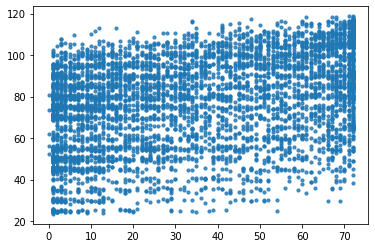

In [19]:
# Use scatter plot to visualize correlation
plt.scatter(telco_internet.tenure,telco_internet.MonthlyCharges, s=10, alpha=0.8)

In [20]:
# Perform statistical test to see correlation between tenure and total charges (pearson r correlation test)
r, p = stats.pearsonr(telco_internet.tenure, telco_internet.TotalCharges)

r, p

(0.9320165580130639, 0.0)

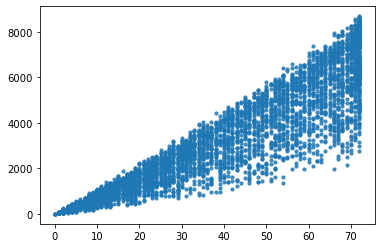

In [21]:
# Use scatter plot to visualize correlation
plt.scatter(telco_internet.tenure, telco_internet.TotalCharges, s=10, alpha=0.8)

- When controlling for customers who do have internet services, correlation does appear to be a little bit stronger for both monthly and total charges 

# 2. Use the employees database.

In [22]:
from env import host, user, password

from sqlalchemy import create_engine

In [23]:
# Create sql to find current employees as well as the amount of days they have been with te company
sql = '''
select *, DATEDIFF(curdate(), hire_date) as 'days'
from employees
join salaries using (emp_no)
where salaries.to_date > curdate();
'''

In [24]:
def get_connection(db, user, host, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [25]:
conn = get_connection('employees', user, host, password)

In [26]:
# Create dataframe from SQL
employees = pd.read_sql(sql, conn)

employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12916
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13133
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12853
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12758
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11742


In [27]:
employees.shape

(240124, 10)

In [28]:
len(employees.emp_no.unique())

240124

In [29]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
 9   days        240124 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


## - Is there a relationship between how long an employee has been with the company and their salary?

In [30]:
# Perform statistical test to determine if there is a relationship between tenure and salary
r, p = stats.pearsonr(employees.days, employees.salary)

r, p

(0.3064625613186077, 0.0)

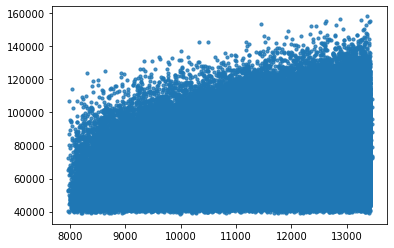

In [31]:
# Visualize distribution
plt.scatter(employees.days,employees.salary, s=10, alpha=0.8)

- Visually there does appear to be an increase in salary for customers who have been with the company the longest, however when performing a statistical test the relationship does not seem strong.

## - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [32]:
# Create sql query to acquire all titles by employees
titles_sql = '''
select *
from titles;
'''

In [33]:
titles = pd.read_sql(titles_sql, conn)

titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [34]:
# Create a count of all titles each individual employee has had
title_count = titles.groupby('emp_no').title.count()

title_count.head()

emp_no
10001    1
10002    1
10003    1
10004    2
10005    2
Name: title, dtype: int64

In [35]:
# Convert count into a dataframe so that it may be added to employees dataframe
title_count = pd.DataFrame(title_count)

title_count.head()

,title
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2


In [36]:
# Merge title count dataframe
emp_titles = employees.merge(title_count, on='emp_no')

emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,days,title
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12916,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13133,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12853,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12758,2
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11742,2


In [37]:
# Perform statistical test to determine if there is a relationship between tenure and number of titles
r, p = stats.pearsonr(emp_titles.days, emp_titles.title)

r, p

(0.2871267889699717, 0.0)

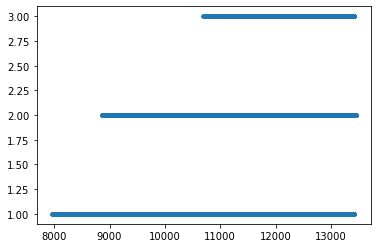

In [38]:
# Visualize distribution
plt.scatter(emp_titles.days,emp_titles.title, s=10, alpha=0.8)

- Like salary, visually there does appear to be an relationship between tenuer and the amount of titles an employee has had, but statistically it was found to not be that strong.

# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [39]:
# Acquire data 
sleepstudy = data('sleepstudy')

sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [40]:
# Perform a statistical test to see if there is a relationship between days and reation time
r, p = stats.pearsonr(sleepstudy['Days'], sleepstudy['Reaction'])

r, p

(0.5352302262650254, 9.89409632221453e-15)

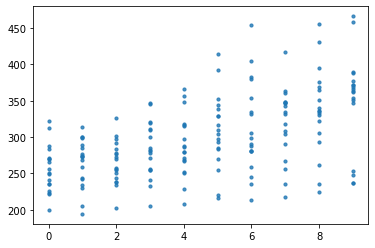

In [41]:
# Visualize distribution
plt.scatter(sleepstudy.Days, sleepstudy.Reaction, s=10, alpha=0.8)

- There does appear to be a slight upwards trend between days and reaction time, per our statistical test and visualization. 